<a href="https://colab.research.google.com/github/ymann/CIS700-Deep-Learning/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Git (0 pts)

Run the following to get the required files needed for this assignment. 

In [10]:
!git clone https://github.com/cis700/hw1-release.git
!mv hw1-release/dills/* .
!mv hw1-release hw1

Cloning into 'hw1-release'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 6), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (26/26), done.


# Classical vs. Deep Learning Approach


## Question 1. Using Logistic Regression to Classify Fashion-MNIST (10 pts)

**Understanding the Dataset**

The first step to machine learning is to understand the dataset that you're given. Therefore, familiarize yourself with the Fashion-MNIST dataset. We recommend reading the paper published about the dataset, which is detailed [here](https://arxiv.org/pdf/1708.07747.pdf).

**Q1a (2 pts):** Explain at a high level what the dataset is (i.e. what are the specifications of the input data and associated labels).

**Loading the Data**

Since there's no built in dataloader for Fashion-MNIST built into sci-kit learn, we've created a dataloader that you may use. The first code snippet is to the install [wget](https://pypi.org/project/wget/) and sets up the directory structure for your data to go in.

In the second code snippet, we provide the function made by the authors of the fashion-MNIST dataset to extract the downloaded data.

**Q1b (3 pts):** Fill in the load_datasets function such that it returns the training data, training labels, testing data, and testing labels. In your report, indicate the dimensions of the training set and the testing set respectively. 

In [11]:
!pip install wget
!mkdir -p data/fashion

In [0]:
import os.path
import wget
import pdb

## Function provided by the creators of Fashion-MNIST to unpack and load their data
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
# Fill in this method to load the Fashion-MNIST dataset
def load_datasets():
  base_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
  files = ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]
  fashion_dir = "data/fashion"
  wget.download("http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/" + files[0], fashion_dir)
  wget.download("http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/" + files[1], fashion_dir)
  wget.download("http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/" + files[2], fashion_dir)
  wget.download("http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/" + files[3], fashion_dir)

  train_images, train_labels = load_mnist(fashion_dir, 'train')
  test_images, test_labels = load_mnist(fashion_dir, 't10k')
  # Return the correct four variables
  return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = load_datasets()

In [19]:
print(len(train_images), len(train_images[0]))
print(len(train_labels))
print(len(test_images), len(test_images[0]))
print(len(test_labels))


60000 784
60000
10000 784
10000


**Creating a Classical Classifier**

**Q1c (5 pts):** Use logistic regression to classify the Fashion-MNIST dataset. Note that because this is not sped up by a GPU this may take a few minutes to run. In your report, plot the learning curve for train and validation accuracy and report the final classification accuracy.



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.8413
0.8627333333333334


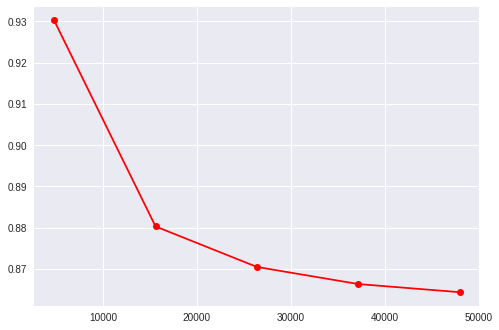

In [35]:
# best_c = 0
# max_score = 0

# for c in range(-4,4):
#   if c==0:
#     continue
#   model = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0, penalty="l2", C=(10**(c)))
#   model.fit(train_images,train_labels)
#   score = model.score(test_images,test_labels)
#   best_c = c if score > max_score else best_c
#   max_score = score if score > max_score else max_score
# print(max_score)
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
model = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0, penalty="l2", C=(10**(0.842)))
model.fit(train_images,train_labels)
train_sizes, train_scores, test_scores = learning_curve(model, train_images,train_labels, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
print(model.score(test_images,test_labels))
print(model.score(train_images,train_labels))

## Question 2. Using Deep Learning to Classify Fashion-MNIST (10 pts)

In this section you will also classify the Fashion-MNIST dataset, however, with a deep neural network instead.

**Downloading PyTorch**

Run the code snippet below to install PyTorch / required packages and set up the GPU.

In [0]:
## Required packages
!pip install tensorflow
!pip install scipy
!pip install numpy
!pip install Pillow
!pip install image

## Add any other packages you may need below

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.0.1-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
  
import torch
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

**PyTorch Tensorboard Integration**

In this class we present the option of using tensorboard to visualize loss / accuracy plots and images. You may choose to use matplotlib instead, however, we recommend using tensorboard as it's becoming the industry standard for analyzing / debugging neural networks. 

Simply run the code snippets below in the order provided, and click on the link to open up the tensorboard dashboard (which should be blank right now!).

In [0]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

!if [ -f ngrok ] ; then echo "Ngrok already installed" ; else wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip > /dev/null 2>&1 && unzip ngrok-stable-linux-amd64.zip > /dev/null 2>&1 ; fi

Ngrok already installed


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print('Tensorboard Link: ' +str(json.load(sys.stdin)['tunnels'][0]['public_url']))"

Tensorboard Link: http://36e68836.ngrok.io


To see how to use Pytorch with tensorboard, check out [this](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/04-utils/tensorboard/main.py) github repo (specifically in main.py). Try plotting something using tensorboard to ensure that it's all working. For help, come to office hours or check out [this](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab) link (where we got the tensorboard-colab integration).

**Important:** Note that we've changed the logging folder to "./logs" . Keep that in mind when using tensorboard.

**PyTorch Dataloaders **

The first step to deep learning is to create a dataloader. It's important to understand how a dataloader works so you can create a custom dataloader for datasets in the future. To understand more, we highly recommend PyTorch's tutorial on dataloaders detailed [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

**Q2a (2 pts):** Create a training and testing dataloader for the Fashion-MNIST dataset. Report the size of the training and testing sets respectively (it should match those from the previous question.)

*Hint:* Fashion-MNIST is a highly used dataset, therefore you do not have to create a whole dataloader from scratch. For some help, take a look at Torch's [dataset](https://pytorch.org/docs/stable/torchvision/datasets.html) and [dataloader](https://pytorch.org/docs/stable/data.html) page.

In [0]:
import torchvision as tp

In [0]:
train = tp.datasets.FashionMNIST(root="./data/fashion",train=True, download=True, transform=transforms.ToTensor())
test = tp.datasets.FashionMNIST(root="./data/fashion",train=False, download=True, transform=transforms.ToTensor(),)
train_loader = torch.utils.data.DataLoader(batch_size=100, shuffle=True, dataset=train)
test_loader = torch.utils.data.DataLoader(batch_size=100, shuffle=True, dataset=test)


In [56]:
print(len(test))
print(len(train))

10000


**Creating the Neural Network Model**

PyTorch has a fantastic tutorial on creating a neural network model, detailed [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html).

**Q2b (2 pts):** Using knowledge from lecture and the tutorial from the link above, create a neural network model to classify the Fashion-MNIST dataset. In your report, detail your network architecture, explaining the choices that you made (i.e. depth of the neural network, activation functions, etc).

*NOTE:* You may **not** use convolutional layers in this model.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

**Creating the Training Loop**

**Q2c (2 pts):** Create a training loop that goes over the entire Fashion-MNIST dataset once. You should tune all hyperparameters (i.e. batch-size, learning rate, etc). Use tensorboard so that in one graph, plot accuracy vs iterations, and in the other plot loss vs iterations (axis labels are not needed if you're using tensorboard). Report the final testing accuracy and loss.

In [0]:
# Use this object to help with tensorboard integration!
from hw1.helper import Logger
logger = Logger('./logs')

**Q2d (2 pts):** Create a testing loop that outputs the accuracy of your trained neural network on the test set. Report the evaluation accuracy of your network on this testing set.

*Hint:* Look at the torch.no_grad() function to evaluate your neural network without updating the weights.

**Q2e (2 pts):** Compare the testing accuracy of your neural network vs. the decision tree clasifier you made in the previous part.

# Question 3. Deep Learning Diagnosis

### Q3.1.a MNIST control group (10 pts)

Using the same PyTorch approach as above, tune the hyperparameters for a neural net on the MNIST dataset.  Plot the learning curve and report its final accuracy in your writeup.  This neural net's performance will serve as the reference point (a "control group") for your analysis in parts 3.2, 3.4, and 3.7

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Tune hyperparameters here
num_epochs = 5

# Load the MNIST dataset (images and labels, both train and test) into 2 DataLoaders
train_dataset = torchvision.datasets.MNIST(root='./data_mnist', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data_mnist', 
                                          train=False, 
                                          transform=transforms.ToTensor())

class Net(nn.Module):

    def __init__(self):
      # TODO: construct the submodules
      return

    def forward(self, x):
      # TODO: define the forward pass
      return
      
# TODO: complete the train loop
total_step = len(train_dataset)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataset):
      pass
    
# TODO: complete the test loop

# TODO: plot the learning curve.

### Q3.1.b CIFAR control group (10 pts)

Similar to the previous part, create a neural network, training, and testing loop and tune the hyperparameters for the CIFAR-10 dataset. Plot the learning curve and report its final accuracy in your writeup.  This neural net's performance will serve as the reference point (a "control group") for your analysis in parts 3.3, 3.5, and 3.6

In [49]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms



# Tune hyperparameters here
num_epochs = 5

# Load the MNIST dataset (images and labels, both train and test) into 2 DataLoaders
train_dataset = torchvision.datasets.CIFAR10(root='./data_cifar', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data_cifar', 
                                          train=False, 
                                          transform=transforms.ToTensor())

class Net(nn.Module):

    def __init__(self):
      # TODO: construct the submodules
      return

    def forward(self, x):
      # TODO: define the forward pass
      return
      
# TODO: complete the train loop
total_step = len(train_dataset)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataset):
      pass
    
# TODO: complete the test loop

# TODO: plot the learning curve.

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data_cifar/cifar-10-python.tar.gz


KeyboardInterrupt: ignored

For each question below, we will provide 3 PyTorch objects: a DataLoader, a neural network model, and an optimizer (you will load them using dill, a serialization library in Python).  For each question, please complete the following:

a.   Train the given neural net using the given DataLoader and the given optimizer.  Plot the learning curve of the network and report the final accuracy in your writeup.

b.   Identify whether the neural net seems to be training correctly.  If not, debug the issue (e.g. printing parameters, gradients, outputs) and report your methodology in your writeup. In addition, we highly recommend checking out [this](https://docs.google.com/document/d/11R5IiLMjddIWM2csfjFBZ__Adu0sY0zuVhbS3_5lLBQ/edit?usp=sharing) google doc with information about common failure modes for training deep neural networks.

c.   If you identify an issue with any of the 3 given objects, replace the buggy object with one of your own making.  Then retrain the neural net, plot the new learning curve, and report the improved accuracy in your writeup.  Note that in each of the following problems, exactly 1 object out of the DataLoader, the neural net, and the optimizer will be buggy.  You should not have to replace more than 1.

Run the code snippet below for some necessary packages / setup.

In [0]:
import torch
import dill
import torch.optim as optim
import time, datetime
import torchvision
import torch.nn as nn
import torch.nn.functional as F
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
# Code referenced from https://gist.github.com/gyglim/1f8dfb1b5c82627ae3efcfbbadb9f514
import tensorflow as tf
import numpy as np
import scipy.misc 
try:
    from StringIO import StringIO  # Python 2.7
except ImportError:
    from io import BytesIO         # Python 3.x


class Logger(object):
    
    def __init__(self, log_dir):
        """Create a summary writer logging to log_dir."""
        self.writer = tf.summary.FileWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Log a scalar variable."""
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
        self.writer.add_summary(summary, step)

    def image_summary(self, tag, images, step):
        """Log a list of images."""

        img_summaries = []
        for i, img in enumerate(images):
            # Write the image to a string
            try:
                s = StringIO()
            except:
                s = BytesIO()
            scipy.misc.toimage(img).save(s, format="png")

            # Create an Image object
            img_sum = tf.Summary.Image(encoded_image_string=s.getvalue(),
                                       height=img.shape[0],
                                       width=img.shape[1])
            # Create a Summary value
            img_summaries.append(tf.Summary.Value(tag='%s/%d' % (tag, i), image=img_sum))

        # Create and write Summary
        summary = tf.Summary(value=img_summaries)
        self.writer.add_summary(summary, step)
        
    def histo_summary(self, tag, values, step, bins=1000):
        """Log a histogram of the tensor of values."""

        # Create a histogram using numpy
        counts, bin_edges = np.histogram(values, bins=bins)

        # Fill the fields of the histogram proto
        hist = tf.HistogramProto()
        hist.min = float(np.min(values))
        hist.max = float(np.max(values))
        hist.num = int(np.prod(values.shape))
        hist.sum = float(np.sum(values))
        hist.sum_squares = float(np.sum(values**2))

        # Drop the start of the first bin
        bin_edges = bin_edges[1:]

        # Add bin edges and counts
        for edge in bin_edges:
            hist.bucket_limit.append(edge)
        for c in counts:
            hist.bucket.append(c)

        # Create and write Summary
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, histo=hist)])
        self.writer.add_summary(summary, step)
        self.writer.flush()


In [0]:
def train_model(net, optimizer, data_loader):
  criterion = torch.nn.CrossEntropyLoss()  
  model = net.to(device)
  data_iter = iter(data_loader)

  iter_per_epoch = len(data_loader)
  now = time.mktime(datetime.datetime.now().timetuple())
  
#   def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_uniform(m.weight)
#         m.bias.data.fill_(0.01)

#   net.apply(init_weights)

  
  logger = Logger(f'./logs/run_{now}/')
  num_epochs = 5
  for i in range (num_epochs):
     # Start training
    for step in range(iter_per_epoch):

      # Reset the data_iter
      if (step+1) % iter_per_epoch == 0:
          data_iter = iter(data_loader)

      # Fetch images and labels
      images, labels = next(data_iter)
      images, labels = images.view(images.size(0), -1).to(device), labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
#       print(labels)
      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Compute accuracy
      _, argmax = torch.max(outputs, 1)
      accuracy = (labels == argmax.squeeze()).float().mean()
      
      # ================================================================== #
      #                        Tensorboard Logging                         #
      # ================================================================== #

      # 1. Log scalar values (scalar summary)
      info = { 'loss': loss.item(), 'accuracy': accuracy.item() }

      for tag, value in info.items():
          logger.scalar_summary(tag, value, (i) * iter_per_epoch + step+1)

#       # 2. Log values and gradients of the parameters (histogram summary)
#       for tag, value in model.named_parameters():
#           tag = tag.replace('.', '/')
# #           print(tag, value)
#           logger.histo_summary(tag, value.data.cpu().numpy(), step+1)
#           logger.histo_summary(tag+'/grad', value.grad.data.cpu().numpy(), i * iter_per_epoch + step+1)

     

  return model

In [0]:
def train_model(net, optimizer, data_loader):
  criterion = torch.nn.CrossEntropyLoss()  
  model = net.to(device)
  data_iter = iter(data_loader)

  iter_per_epoch = len(data_loader)
  now = time.mktime(datetime.datetime.now().timetuple())
  
#   def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_uniform(m.weight)
#         m.bias.data.fill_(0.01)

#   net.apply(init_weights)

  
  num_epochs = 5
  for i in range (num_epochs):
     # Start training
    for step in range(iter_per_epoch):

      # Reset the data_iter
      if (step+1) % iter_per_epoch == 0:
          data_iter = iter(data_loader)

      # Fetch images and labels
      images, labels = next(data_iter)
      images, labels = images.view(images.size(0), -1).to(device), labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
#       print(labels)

      # Compute accuracy
      _, argmax = torch.max(outputs, 1)
      accuracy = (labels == argmax.squeeze()).float().mean()


  return model

### Q3.2 MNIST diagnosis 1 (10 pts)

In [0]:
q_3_2_data_loader = dill.load( open( "q3_2_loader.p", "rb" ) )
train_loader, test_loader = q_3_2_data_loader()
q_3_2_net_loader = dill.load( open( "q3_2_net.p", "rb" ) )
net, optimizer = q_3_2_net_loader()
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
net.apply(init_weights)
# model = train_model(net, optimizer, train_loader)
# print(len(iter(train_loader)))
# countarr = [0,0,0,0,0,0,0,0,0,0]
# for i in range (len(train_loader.dataset)):
#   countarr[train_loader.dataset[i][1]] = countarr[train_loader.dataset[i][1]] + 1
# print(countarr)


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


### Q3.3 CIFAR diagnosis 1 (10 pts)

In [62]:
q_3_3_data_loader = dill.load( open( "q3_3_loader.p", "rb" ) )
train_loader, test_loader = q_3_3_data_loader()
q_3_3_net_loader = dill.load( open( "q3_3_net.p", "rb" ) )
net, optimizer = q_3_3_net_loader()
new_train_loader = torch.utils.data.DataLoader(batch_size=100, shuffle=True, dataset=train_loader.dataset)
# model = train_model(net, optimizer, new_train_loader)
# print(net)
print(net`)

Files already downloaded and verified
Files already downloaded and verified
Q_3_3_net(
  (fc1): Linear(in_features=3072, out_features=8192, bias=True)
  (fc2): Linear(in_features=8192, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=10, bias=True)
)


### Q3.4 MNIST diagnosis 2 (10 pts)

*Hint:* Look at the test accuracy

In [0]:
q_3_4_data_loader = dill.load( open( "q3_4_loader.p", "rb" ) )
train_loader, test_loader = q_3_4_data_loader()
q_3_4_net_loader = dill.load( open( "q3_4_net.p", "rb" ) )
net, optimizer = q_3_4_net_loader()
new_train_set = torchvision.datasets.MNIST(root='./data_mnist', train=True, 
                           transform=transforms.ToTensor(), download=True)
new_test_set = torchvision.datasets.MNIST(root='./data_mnist', train=False, 
                           transform=transforms.ToTensor(), download=True)
new_train_loader = torch.utils.data.DataLoader(batch_size=100, shuffle=True, dataset=new_train_set)
model = train_model(net, optimizer, train_loader)

NameError: ignored

### Q3.5 CIFAR diagnosis 2 (10 pts)

In [0]:
q_3_5_data_loader = dill.load( open( "q3_5_loader.p", "rb" ) )
train_loader, test_loader = q_3_5_data_loader()
q_3_5_net_loader = dill.load( open( "q3_5_net.p", "rb" ) )
net,optimizer = q_3_5_net_loader()
for g in optimizer.param_groups:
    g['lr'] = 0.003
model = train_model(net, optimizer, train_loader)
# print(optimizer)
# print(net)

Files already downloaded and verified
Files already downloaded and verified


### Q3.6 CIFAR diagnosis 3 (10 pts)

In [0]:
q_3_6_data_loader = dill.load( open( "q3_6_loader.p", "rb" ) )
train_loader, test_loader = q_3_6_data_loader()
q_3_6_net_loader = dill.load( open( "q3_6_net.p", "rb" ) )
net, optimizer = q_3_6_net_loader()
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        m.bias.data.fill_(0.01)
net.apply(init_weights)

model = train_model(net, optimizer, train_loader)
# print(optimizer)
# print(net)
# print(net.forward)

Files already downloaded and verified
Files already downloaded and verified


### Q 3.7 MNIST diagnosis 3 (10 pts)

In [0]:
q_3_7_data_loader = dill.load( open( "q3_7_loader.p", "rb" ) )
# q_3_2_data_loader = dill.load( open( "q3_2_loader.p", "rb" ) )

train_loader, test_loader = q_3_7_data_loader()
# train_loader, test_loader = q_3_2_data_loader()

q_3_7_net_loader = dill.load( open( "q3_7_net.p", "rb" ) )
net, optimizer = q_3_7_net_loader()
# model = train_model(net, optimizer, train_loader)
print(len(train_loader.dataset))
# new_t_loader = torch.utils.data.DataLoader(batch_size=100, shuffle=True, dataset=train_loader.dataset)
countarr2 = [0,0,0,0,0,0,0,0,0,0]
for i in range (len(train_loader.dataset)):
  countarr2[train_loader.dataset[i][1]] = countarr2[train_loader.dataset[i][1]] + 1
print(countarr2)

60000
[6005, 6423, 6053, 6085, 5811, 5650, 5959, 6099, 5929, 5986]
